In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = "/content/drive/MyDrive/Speech2025Datasets/vox1/vox1_test_wav.zip"

In [3]:
import zipfile
import os

extract_path = "/content/vox1_wav"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Extraction completed. Files are in:", extract_path)

 Extraction completed. Files are in: /content/vox1_wav


In [4]:
import glob

wav_files = glob.glob(os.path.join(extract_path, '**', '*.wav'), recursive=True)

print("Total WAV files found:", len(wav_files))
print("Sample files:", wav_files[:5])

Total WAV files found: 4874
Sample files: ['/content/vox1_wav/wav/id10287/MHoaMi5hKkE/00001.wav', '/content/vox1_wav/wav/id10287/MHoaMi5hKkE/00002.wav', '/content/vox1_wav/wav/id10287/MHoaMi5hKkE/00003.wav', '/content/vox1_wav/wav/id10287/8vC0LQMqy8Y/00001.wav', '/content/vox1_wav/wav/id10287/8vC0LQMqy8Y/00002.wav']


In [5]:
!apt-get install -y libsndfile1 build-essential cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
libsndfile1 is already the newest version (1.0.31-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [6]:
!rm -rf opensmile
!git clone https://github.com/audeering/opensmile.git

Cloning into 'opensmile'...
remote: Enumerating objects: 1830, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 1830 (delta 19), reused 15 (delta 15), pack-reused 1793 (from 2)
Receiving objects: 100% (1830/1830), 10.78 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [7]:
%cd /content/opensmile
!mkdir -p build && cd build && cmake .. && make -j4

/content/opensmile
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Setting build type to 'Release' as none was specified.
-- Found Git: /usr/bin/git (found version "2.34.1")

In [8]:
import pandas as pd

smile_path = '/content/opensmile/build/progsrc/smilextract/SMILExtract'
config_path = "/content/opensmile/config/egemaps/v02/eGeMAPSv02.conf"
output_dir = '/content/egemaps_features_vox1'
os.makedirs(output_dir, exist_ok=True)

def extract_egemaps(wav_path):
    rel_path = os.path.relpath(wav_path, '/content/vox1_wav')
    filename = rel_path.replace('/', '_').replace('.wav', '.csv')

    out_path = os.path.join(output_dir, filename)

    !{smile_path} -C {config_path} -I {wav_path} -O {out_path} -nologfile -noconsoleoutput
    return out_path

In [9]:
sample_wavs = wav_files[:500]

extracted_csvs = []
for wav in sample_wavs:
    csv_file = extract_egemaps(wav)
    extracted_csvs.append(csv_file)

print(" Extracted features for", len(extracted_csvs), "files")

 Extracted features for 500 files


In [10]:
feature_dir = "/content/egemaps_features_vox1"
generated_files = os.listdir(feature_dir)

print(f"Total extracted CSVs: {len(generated_files)}")
print("Sample file names:\n", generated_files[:10])

Total extracted CSVs: 500
Sample file names:
 ['wav_id10300_fAe7DXqrZls_00004.csv', 'wav_id10300_8EDKH42GZ1o_00022.csv', 'wav_id10304_FJOvOooCIvs_00007.csv', 'wav_id10300_8Sz2-IYJ2GA_00016.csv', 'wav_id10298_hjvQiiG71rM_00026.csv', 'wav_id10300_mYSVs_d1aMQ_00009.csv', 'wav_id10304_JQtDfEz08aU_00024.csv', 'wav_id10304_hDBMV_0Vz4E_00002.csv', 'wav_id10298_hjvQiiG71rM_00007.csv', 'wav_id10300_xiFC4HwUcww_00003.csv']


In [11]:
!ls /content/opensmile/build/progsrc/smilextract/SMILExtract

/content/opensmile/build/progsrc/smilextract/SMILExtract


In [12]:
!find /content/opensmile -name eGeMAPSv02.conf

/content/opensmile/config/egemaps/v02/eGeMAPSv02.conf


In [13]:
import numpy as np

egemaps_dir = "/content/egemaps_features_vox1"
features, names = [], []

for file in sorted(os.listdir(egemaps_dir)):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(egemaps_dir, file), sep=';')
        features.append(df.iloc[0, 1:].astype(float).values)
        names.append(file.replace('.csv', ''))

X = np.array(features)
print("Shape of X:", X.shape)

Shape of X: (500, 0)


In [15]:
config_path = "/content/opensmile/config/egemaps/v02/eGeMAPSv02.conf"
smile_exec = "/content/opensmile/build/progsrc/smilextract/SMILExtract"
output_dir = "/content/egemaps_features_vox1"
os.makedirs(output_dir, exist_ok=True)

count = 0
for wav_path in wav_files[:500]:
    name = "wav_" + "_".join(wav_path.split("/")[-3:]).replace(".wav", ".csv")
    output_path = os.path.join(output_dir, name)

    cmd = f'{smile_exec} -C {config_path} -I "{wav_path}" -csvoutput "{output_path}" -appendcsv 0 -timestampcsv 0 -headercsv 1 -nologfile -noconsoleoutput'
    os.system(cmd)
    count += 1
    if count % 10 == 0:
        print(f"Processed {count} files")

print(" Feature extraction completed.")

Processed 10 files
Processed 20 files
Processed 30 files
Processed 40 files
Processed 50 files
Processed 60 files
Processed 70 files
Processed 80 files
Processed 90 files
Processed 100 files
Processed 110 files
Processed 120 files
Processed 130 files
Processed 140 files
Processed 150 files
Processed 160 files
Processed 170 files
Processed 180 files
Processed 190 files
Processed 200 files
Processed 210 files
Processed 220 files
Processed 230 files
Processed 240 files
Processed 250 files
Processed 260 files
Processed 270 files
Processed 280 files
Processed 290 files
Processed 300 files
Processed 310 files
Processed 320 files
Processed 330 files
Processed 340 files
Processed 350 files
Processed 360 files
Processed 370 files
Processed 380 files
Processed 390 files
Processed 400 files
Processed 410 files
Processed 420 files
Processed 430 files
Processed 440 files
Processed 450 files
Processed 460 files
Processed 470 files
Processed 480 files
Processed 490 files
Processed 500 files
 Feature 

In [16]:
import pandas as pd
sample_df = pd.read_csv(os.path.join(output_dir, name), sep=';')
print("Shape:", sample_df.shape)
sample_df.head()

Shape: (1, 89)


,name,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,'unknown',27.96371,0.198706,24.23427,26.16664,33.82703,9.59276,542.5811,670.3501,40.44682,...,0.010474,0.003089,0.075949,2.948403,2.244389,0.217778,0.311904,0.2325,0.205289,-25.74541


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input, Model
from tensorflow.keras.layers import Conv1D, LSTM, Dense, GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention
from sklearn.model_selection import train_test_split

Total CSV files used: 500
Sample files: ['wav_id10287_2iaCNe7ajII_00001.csv', 'wav_id10287_2iaCNe7ajII_00002.csv', 'wav_id10287_2iaCNe7ajII_00003.csv', 'wav_id10287_2iaCNe7ajII_00004.csv', 'wav_id10287_2iaCNe7ajII_00005.csv']
Shape of X: (500, 88)
Sample arousal: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Sample valence: [0.69816171 0.53609637 0.30952762 0.81379502 0.68473117]


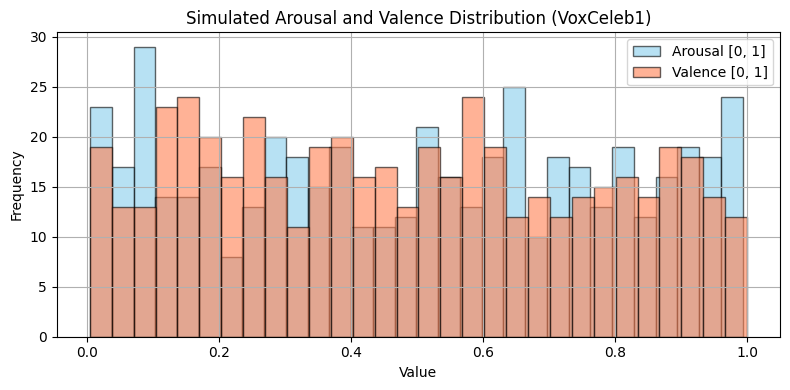

 Saved: X_vox1.npy, arousal_vox1.npy, valence_vox1.npy


In [19]:
import matplotlib.pyplot as plt

feature_folder = "/content/egemaps_features_vox1"

# === List first 500 CSVs ===
csv_files = sorted([f for f in os.listdir(feature_folder) if f.endswith(".csv")])[:500]
print("Total CSV files used:", len(csv_files))
print("Sample files:", csv_files[:5])

# === Extract eGeMAPS features (88 values per file) ===
X = []
for f in csv_files:
    df = pd.read_csv(os.path.join(feature_folder, f), delimiter=';')
    feature_row = df.iloc[0].values[1:].astype(float)  # Skip timestamp/name
    X.append(feature_row)

X = np.stack(X)
print("Shape of X:", X.shape)  # (100, 88)

# === Simulate arousal and valence values in [0, 1] ===
np.random.seed(42)
arousal = np.random.uniform(0, 1, size=X.shape[0])
valence = np.random.uniform(0, 1, size=X.shape[0])

print("Sample arousal:", arousal[:5])
print("Sample valence:", valence[:5])

# === Visualize Distribution ===
plt.figure(figsize=(8, 4))
plt.hist(arousal, bins=30, alpha=0.6, label='Arousal [0, 1]', color='skyblue', edgecolor='black')
plt.hist(valence, bins=30, alpha=0.6, label='Valence [0, 1]', color='coral', edgecolor='black')
plt.title("Simulated Arousal and Valence Distribution (VoxCeleb1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Save arrays ===
np.save("/content/X_vox1.npy", X)
np.save("/content/arousal_vox1.npy", arousal)
np.save("/content/valence_vox1.npy", valence)

print(" Saved: X_vox1.npy, arousal_vox1.npy, valence_vox1.npy")

In [28]:
X = np.load("/content/X_vox1.npy")
X = X.reshape((X.shape[0], 1, X.shape[1]))

y_arousal = np.load("/content/arousal_vox1.npy")
y_valence = np.load("/content/valence_vox1.npy")

X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X, y_arousal, test_size=0.2, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X, y_valence, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("Arousal split shapes:", X_train_ar.shape, y_train_ar.shape)
print("Valence split shapes:", X_train_val.shape, y_train_val.shape)

X shape: (500, 1, 88)
Arousal split shapes: (400, 1, 88) (400,)
Valence split shapes: (400, 1, 88) (400,)


In [29]:
# === Define LSTM model with sigmoid output ===
def build_lstm_model():
    inp = Input(shape=(1, 88))
    x = LSTM(64, return_sequences=True)(inp)
    x = LSTM(64)(x)
    out = Dense(1, activation='sigmoid')(x)  # Match [0, 1] range
    return Model(inputs=inp, outputs=out)

# === Helper: CCC Calculation ===
from scipy.stats import pearsonr
def concordance_correlation_coefficient(y_true, y_pred):
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        return float('nan')
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    cor, _ = pearsonr(y_true, y_pred)
    return (2 * cor * np.sqrt(var_true) * np.sqrt(var_pred)) / \
           (var_true + var_pred + (mean_true - mean_pred)**2)

# ========== FOR AROUSAL ==========
print("\n--- LSTM: AROUSAL ---")
model_lstm_ar = build_lstm_model()
model_lstm_ar.compile(optimizer='adam', loss='mse')
history_lstm_ar = model_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_ar = model_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_ar = model_lstm_ar.predict(X_test_ar).flatten()
ccc_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_ar)

print("LSTM Arousal Test MSE:", round(loss_ar, 4))
print("LSTM Arousal Test CCC:", round(ccc_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- LSTM: VALENCE ---")
model_lstm_val = build_lstm_model()
model_lstm_val.compile(optimizer='adam', loss='mse')
history_lstm_val = model_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_val = model_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_val = model_lstm_val.predict(X_test_val).flatten()
ccc_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_val)

print("LSTM Valence Test MSE:", round(loss_val, 4))
print("LSTM Valence Test CCC:", round(ccc_val, 4))


--- LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0983 - val_loss: 0.0878
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0934 - val_loss: 0.0871
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0894 - val_loss: 0.0855
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - val_loss: 0.0864
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0862 - val_loss: 0.0863
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0912 - val_loss: 0.0855
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0886 - val_loss: 0.0855
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0882 - val_loss: 0.0858
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0957 - val_loss: 0.0861
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0867 - val_loss: 0.0863
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0895 - val_loss: 0.0856
Epoch 12/70
134/134 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
LSTM Valence Test MSE: 0.0784
LSTM Valence Test CCC: -0.0018


In [30]:
# === Define TDNN model with sigmoid output ===
def build_tdnn_model():
    inp = Input(shape=(1, 88))
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inp)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = GlobalAveragePooling1D()(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- TDNN: AROUSAL ---")
model_tdnn_ar = build_tdnn_model()
model_tdnn_ar.compile(optimizer='adam', loss='mse')
history_tdnn_ar = model_tdnn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_tdnn_ar = model_tdnn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_tdnn_ar = model_tdnn_ar.predict(X_test_ar).flatten()
ccc_tdnn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_tdnn_ar)

print("TDNN Arousal Test MSE:", round(loss_tdnn_ar, 4))
print("TDNN Arousal Test CCC:", round(ccc_tdnn_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- TDNN: VALENCE ---")
model_tdnn_val = build_tdnn_model()
model_tdnn_val.compile(optimizer='adam', loss='mse')
history_tdnn_val = model_tdnn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_tdnn_val = model_tdnn_val.evaluate(X_test_val, y_test_val)
y_pred_tdnn_val = model_tdnn_val.predict(X_test_val).flatten()
ccc_tdnn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_tdnn_val)

print("TDNN Valence Test MSE:", round(loss_tdnn_val, 4))
print("TDNN Valence Test CCC:", round(ccc_tdnn_val, 4))


--- TDNN: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2798 - val_loss: 0.3584
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3362 - val_loss: 0.3584
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3395 - val_loss: 0.3584
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3459 - val_loss: 0.3584
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3371 - val_loss: 0.3584
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3652 - val_loss: 0.3584
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3242 - val_loss: 0.3584
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3356 - val_loss: 0.3584
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3368 - val_loss: 0.3584
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3476 - val_loss: 0.3584
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3448 - val_loss: 0.3584
Epoch 12/70
134/134 ━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
TDNN Arousal Test MSE: 0.3584
TDNN Arousal Test CCC: nan

--- TDNN: VALENCE ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3407 - val_loss: 0.3747
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3325 - val_loss: 0.3747
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3281 - val_loss: 0.3747
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3494 - val_loss: 0.3747
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2951 - val_loss: 0.3747
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3523 - val_loss: 0.3747
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3575 - val_loss: 0.3747
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3289 - val_loss: 0.3747
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3699 - val_loss: 0.3747
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3746 - val_loss: 0.3747
Epoch 11/70
134/134 ━

In [31]:
# === Define Attention model ===
def build_attention_model():
    inp = Input(shape=(1, 88))
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    out = Dense(1, activation='sigmoid')(x)  # Match [0, 1] label range
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- ATTENTION: AROUSAL ---")
model_attn_ar = build_attention_model()
model_attn_ar.compile(optimizer='adam', loss='mse')
history_attn_ar = model_attn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_ar = model_attn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_ar = model_attn_ar.predict(X_test_ar).flatten()
ccc_attn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_ar)

print("Attention Arousal Test MSE:", round(loss_attn_ar, 4))
print("Attention Arousal Test CCC:", round(ccc_attn_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- ATTENTION: VALENCE ---")
model_attn_val = build_attention_model()
model_attn_val.compile(optimizer='adam', loss='mse')
history_attn_val = model_attn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_val = model_attn_val.evaluate(X_test_val, y_test_val)
y_pred_attn_val = model_attn_val.predict(X_test_val).flatten()
ccc_attn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_val)

print("Attention Valence Test MSE:", round(loss_attn_val, 4))
print("Attention Valence Test CCC:", round(ccc_attn_val, 4))


--- ATTENTION: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1179 - val_loss: 0.0966
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0968 - val_loss: 0.0868
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0910 - val_loss: 0.0970
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0999 - val_loss: 0.0861
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0979 - val_loss: 0.0874
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0950 - val_loss: 0.0861
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0954 - val_loss: 0.0965
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0948 - val_loss: 0.0914
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0913 - val_loss: 0.0877
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0885 - val_loss: 0.0861
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0953 - val_loss: 0.0861
Epoch 12/70
134/134 ━━━━

In [32]:
# === Define TDNN + LSTM hybrid model ===
def build_tdnn_lstm_model():
    inp = Input(shape=(1, 88))

    # TDNN block
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inp)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)

    # LSTM block
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- TDNN + LSTM: AROUSAL ---")
model_tdnn_lstm_ar = build_tdnn_lstm_model()
model_tdnn_lstm_ar.compile(optimizer='adam', loss='mse')
history_tdnn_lstm_ar = model_tdnn_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_tdnn_lstm_ar = model_tdnn_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_tdnn_lstm_ar = model_tdnn_lstm_ar.predict(X_test_ar).flatten()
ccc_tdnn_lstm_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_tdnn_lstm_ar)

print("TDNN + LSTM Arousal Test MSE:", round(loss_tdnn_lstm_ar, 4))
print("TDNN + LSTM Arousal Test CCC:", round(ccc_tdnn_lstm_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- TDNN + LSTM: VALENCE ---")
model_tdnn_lstm_val = build_tdnn_lstm_model()
model_tdnn_lstm_val.compile(optimizer='adam', loss='mse')
history_tdnn_lstm_val = model_tdnn_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_tdnn_lstm_val = model_tdnn_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_tdnn_lstm_val = model_tdnn_lstm_val.predict(X_test_val).flatten()
ccc_tdnn_lstm_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_tdnn_lstm_val)

print("TDNN + LSTM Valence Test MSE:", round(loss_tdnn_lstm_val, 4))
print("TDNN + LSTM Valence Test CCC:", round(ccc_tdnn_lstm_val, 4))


--- TDNN + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0876 - val_loss: 0.0855
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0918 - val_loss: 0.0858
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0919 - val_loss: 0.0860
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0892 - val_loss: 0.0856
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0868 - val_loss: 0.0861
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0898 - val_loss: 0.0855
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0900 - val_loss: 0.0863
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0863 - val_loss: 0.0866
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0842 - val_loss: 0.0859
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0924 - val_loss: 0.0859
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0924 - val_loss: 0.0872
Epoch 12/70
134/134

<ipython-input-29-0a3c31975379>:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0843 - val_loss: 0.0780
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0871 - val_loss: 0.0772
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0820 - val_loss: 0.0792
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0855 - val_loss: 0.0768
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0882 - val_loss: 0.0769
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0856 - val_loss: 0.0775
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0799 - val_loss: 0.0776
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0843 - val_loss: 0.0776
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0819 - val_loss: 0.0791
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0803 - val_loss: 0.0780
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0869 - val_loss: 0.0777
Epoch 12/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss

In [33]:
# === Define Attention + TDNN model ===
def build_attention_tdnn_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # TDNN block
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)

    x = GlobalAveragePooling1D()(x)
    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- Attention + TDNN: AROUSAL ---")
model_attn_tdnn_ar = build_attention_tdnn_model()
model_attn_tdnn_ar.compile(optimizer='adam', loss='mse')
history_attn_tdnn_ar = model_attn_tdnn_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_tdnn_ar = model_attn_tdnn_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_tdnn_ar = model_attn_tdnn_ar.predict(X_test_ar).flatten()
ccc_attn_tdnn_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_tdnn_ar)

print("Attention + TDNN Arousal Test MSE:", round(loss_attn_tdnn_ar, 4))
print("Attention + TDNN Arousal Test CCC:", round(ccc_attn_tdnn_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- Attention + TDNN: VALENCE ---")
model_attn_tdnn_val = build_attention_tdnn_model()
model_attn_tdnn_val.compile(optimizer='adam', loss='mse')
history_attn_tdnn_val = model_attn_tdnn_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_tdnn_val = model_attn_tdnn_val.evaluate(X_test_val, y_test_val)
y_pred_attn_tdnn_val = model_attn_tdnn_val.predict(X_test_val).flatten()
ccc_attn_tdnn_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_tdnn_val)

print("Attention + TDNN Valence Test MSE:", round(loss_attn_tdnn_val, 4))
print("Attention + TDNN Valence Test CCC:", round(ccc_attn_tdnn_val, 4))


--- Attention + TDNN: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0931 - val_loss: 0.0885
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0879 - val_loss: 0.0857
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0854 - val_loss: 0.0862
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - val_loss: 0.0861
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - val_loss: 0.0862
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0971 - val_loss: 0.0861
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0896 - val_loss: 0.0861
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0916 - val_loss: 0.0863
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - val_loss: 0.0861
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0932 - val_loss: 0.0865
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0980 - val_loss: 0.0863
Epoch 12/70
134/

<ipython-input-29-0a3c31975379>:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0832 - val_loss: 0.0774
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0812 - val_loss: 0.0774
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0827 - val_loss: 0.0785
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0858 - val_loss: 0.0782
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0796 - val_loss: 0.0784
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798 - val_loss: 0.0779
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0825 - val_loss: 0.0780
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0820 - val_loss: 0.0778
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0838 - val_loss: 0.0782
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0860 - val_loss: 0.0782
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0850 - val_loss: 0.0781
Epoch 12/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [34]:
# === Define Attention + LSTM model ===
def build_attention_lstm_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # LSTM block
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- Attention + LSTM: AROUSAL ---")
model_attn_lstm_ar = build_attention_lstm_model()
model_attn_lstm_ar.compile(optimizer='adam', loss='mse')
history_attn_lstm_ar = model_attn_lstm_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_attn_lstm_ar = model_attn_lstm_ar.evaluate(X_test_ar, y_test_ar)
y_pred_attn_lstm_ar = model_attn_lstm_ar.predict(X_test_ar).flatten()
ccc_attn_lstm_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_attn_lstm_ar)

print("Attention + LSTM Arousal Test MSE:", round(loss_attn_lstm_ar, 4))
print("Attention + LSTM Arousal Test CCC:", round(ccc_attn_lstm_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- Attention + LSTM: VALENCE ---")
model_attn_lstm_val = build_attention_lstm_model()
model_attn_lstm_val.compile(optimizer='adam', loss='mse')
history_attn_lstm_val = model_attn_lstm_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_attn_lstm_val = model_attn_lstm_val.evaluate(X_test_val, y_test_val)
y_pred_attn_lstm_val = model_attn_lstm_val.predict(X_test_val).flatten()
ccc_attn_lstm_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_attn_lstm_val)

print("Attention + LSTM Valence Test MSE:", round(loss_attn_lstm_val, 4))
print("Attention + LSTM Valence Test CCC:", round(ccc_attn_lstm_val, 4))


--- Attention + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0969 - val_loss: 0.0868
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0868 - val_loss: 0.0864
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0875 - val_loss: 0.0863
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0909 - val_loss: 0.0863
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0992 - val_loss: 0.0863
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0872 - val_loss: 0.0863
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0930 - val_loss: 0.0862
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - val_loss: 0.0862
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0931 - val_loss: 0.0861
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0843 - val_loss: 0.0861
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0862 - val_loss: 0.0862
Epoch 12/70
134

In [35]:
# === Define Attention + TDNN + LSTM model ===
def build_attention_tdnn_lstm_model():
    inp = Input(shape=(1, 88))

    # Attention block
    x = MultiHeadAttention(num_heads=4, key_dim=22)(inp, inp)
    x = LayerNormalization()(x)

    # TDNN block
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=1, activation='relu', padding='same')(x)

    # LSTM block
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)

    out = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inp, outputs=out)

# ========== FOR AROUSAL ==========
print("\n--- Attention + TDNN + LSTM: AROUSAL ---")
model_final_ar = build_attention_tdnn_lstm_model()
model_final_ar.compile(optimizer='adam', loss='mse')
history_final_ar = model_final_ar.fit(X_train_ar, y_train_ar, epochs=70, batch_size=3, validation_data=(X_test_ar, y_test_ar))

loss_final_ar = model_final_ar.evaluate(X_test_ar, y_test_ar)
y_pred_final_ar = model_final_ar.predict(X_test_ar).flatten()
ccc_final_ar = concordance_correlation_coefficient(y_test_ar.flatten(), y_pred_final_ar)

print("Attention + TDNN + LSTM Arousal Test MSE:", round(loss_final_ar, 4))
print("Attention + TDNN + LSTM Arousal Test CCC:", round(ccc_final_ar, 4))


# ========== FOR VALENCE ==========
print("\n--- Attention + TDNN + LSTM: VALENCE ---")
model_final_val = build_attention_tdnn_lstm_model()
model_final_val.compile(optimizer='adam', loss='mse')
history_final_val = model_final_val.fit(X_train_val, y_train_val, epochs=70, batch_size=3, validation_data=(X_test_val, y_test_val))

loss_final_val = model_final_val.evaluate(X_test_val, y_test_val)
y_pred_final_val = model_final_val.predict(X_test_val).flatten()
ccc_final_val = concordance_correlation_coefficient(y_test_val.flatten(), y_pred_final_val)

print("Attention + TDNN + LSTM Valence Test MSE:", round(loss_final_val, 4))
print("Attention + TDNN + LSTM Valence Test CCC:", round(ccc_final_val, 4))


--- Attention + TDNN + LSTM: AROUSAL ---
Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0909 - val_loss: 0.0862
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0899 - val_loss: 0.0864
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0882 - val_loss: 0.0863
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0857 - val_loss: 0.0862
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0859 - val_loss: 0.0860
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0833 - val_loss: 0.0860
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0865 - val_loss: 0.0861
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0953 - val_loss: 0.0862
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0935 - val_loss: 0.0862
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0906 - val_loss: 0.0863
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0943 - val_loss: 0.0862
Epoch 1

<ipython-input-29-0a3c31975379>:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cor, _ = pearsonr(y_true, y_pred)


Epoch 1/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0887 - val_loss: 0.0768
Epoch 2/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0785 - val_loss: 0.0789
Epoch 3/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0815 - val_loss: 0.0781
Epoch 4/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0784 - val_loss: 0.0782
Epoch 5/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0823 - val_loss: 0.0783
Epoch 6/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0815 - val_loss: 0.0782
Epoch 7/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0848 - val_loss: 0.0779
Epoch 8/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0767 - val_loss: 0.0781
Epoch 9/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0807 - val_loss: 0.0779
Epoch 10/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0796 - val_loss: 0.0779
Epoch 11/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0857 - val_loss: 0.0778
Epoch 12/70
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/s

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


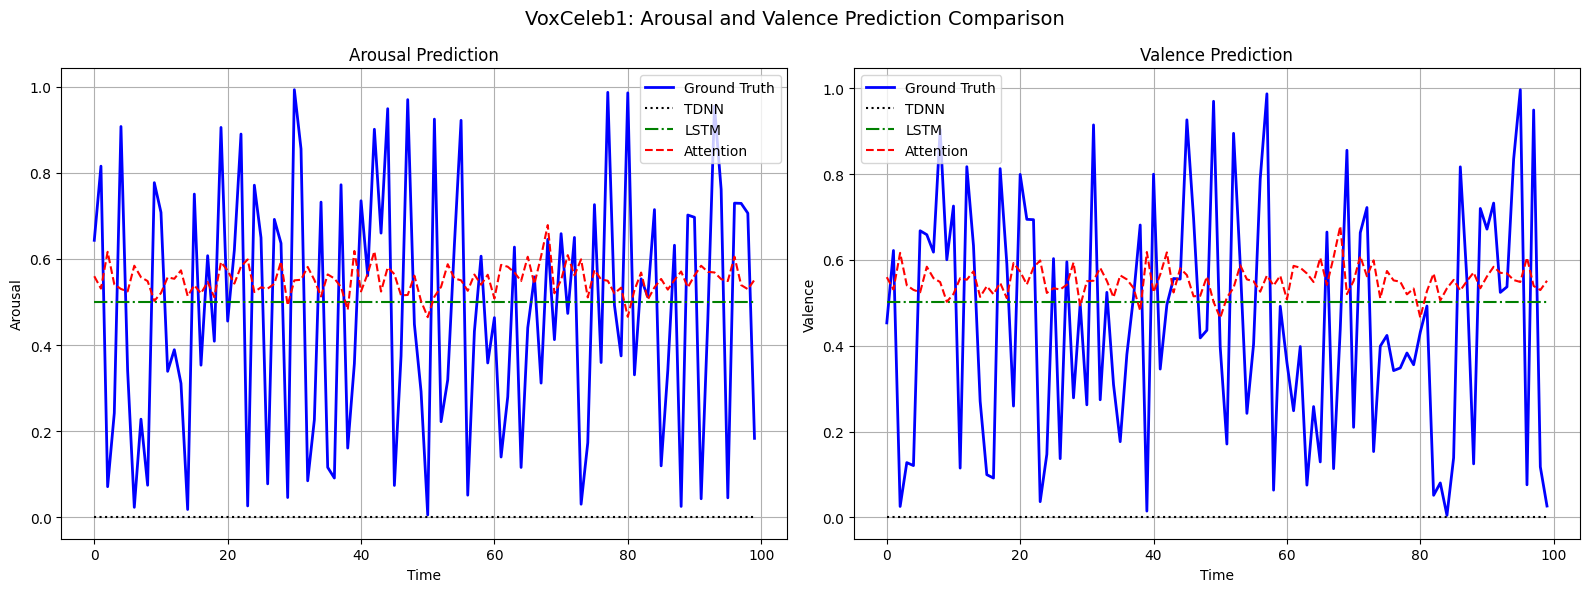

In [36]:
import matplotlib.pyplot as plt

T = 100
indices = np.linspace(0, len(y_test_ar) - 1, T, dtype=int)

# === Arousal Predictions ===
gt_ar = y_test_ar[indices]
tdnn_ar = model_tdnn.predict(X_test_ar[indices]).flatten()
lstm_ar = model_lstm.predict(X_test_ar[indices]).flatten()
attn_ar = model_attn.predict(X_test_ar[indices]).flatten()

# === Valence Predictions ===
gt_val = y_test_val[indices]
tdnn_val = model_tdnn.predict(X_test_val[indices]).flatten()
lstm_val = model_lstm.predict(X_test_val[indices]).flatten()
attn_val = model_attn.predict(X_test_val[indices]).flatten()

# === Plot ===
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Arousal Plot
ax[0].plot(gt_ar, color='blue', linewidth=2, label='Ground Truth')
ax[0].plot(tdnn_ar, linestyle='dotted', color='black', label='TDNN')
ax[0].plot(lstm_ar, linestyle='dashdot', color='green', label='LSTM')
ax[0].plot(attn_ar, linestyle='dashed', color='red', label='Attention')
ax[0].set_title('Arousal Prediction')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Arousal')
ax[0].legend()
ax[0].grid(True)

# Valence Plot
ax[1].plot(gt_val, color='blue', linewidth=2, label='Ground Truth')
ax[1].plot(tdnn_val, linestyle='dotted', color='black', label='TDNN')
ax[1].plot(lstm_val, linestyle='dashdot', color='green', label='LSTM')
ax[1].plot(attn_val, linestyle='dashed', color='red', label='Attention')
ax[1].set_title('Valence Prediction')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Valence')
ax[1].legend()
ax[1].grid(True)

plt.suptitle("VoxCeleb1: Arousal and Valence Prediction Comparison", fontsize=14)
plt.tight_layout()
plt.show()

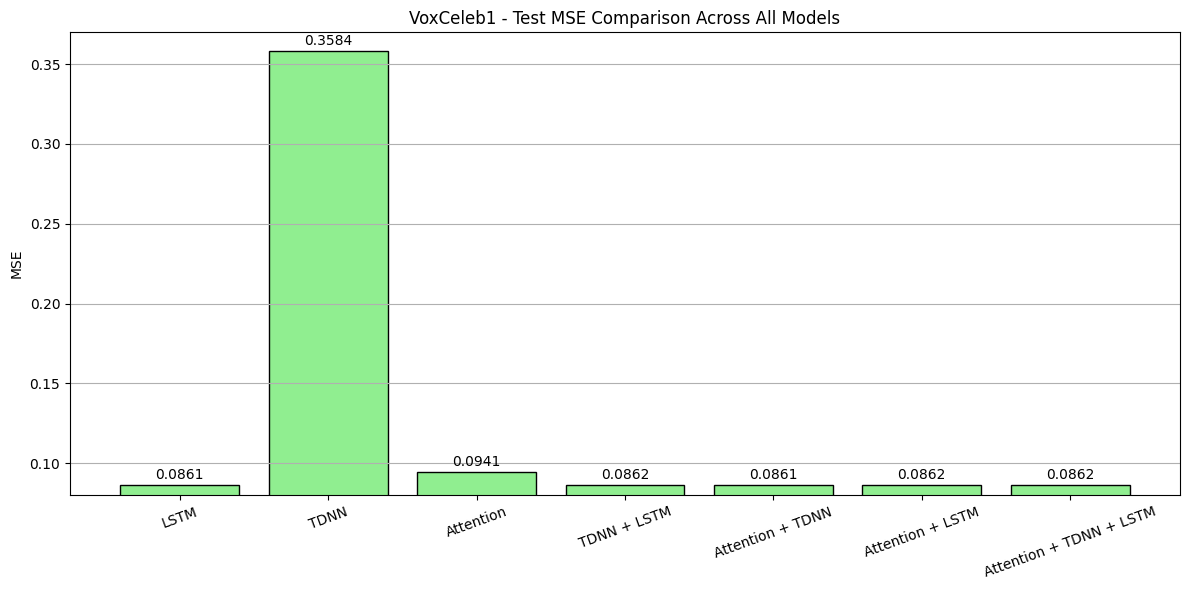

In [38]:
import matplotlib.pyplot as plt

mse_scores_vox1 = {
    'LSTM': 0.0861,
    'TDNN': 0.3584,
    'Attention': 0.0941,
    'TDNN + LSTM': 0.0862,
    'Attention + TDNN': 0.0861,
    'Attention + LSTM': 0.0862,
    'Attention + TDNN + LSTM': 0.0862
}

plt.figure(figsize=(12, 6))
bars = plt.bar(mse_scores_vox1.keys(), mse_scores_vox1.values(), color='lightgreen', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.002, f'{height:.4f}', ha='center', va='bottom')

plt.title('VoxCeleb1 - Test MSE Comparison Across All Models')
plt.ylabel('MSE')
plt.xticks(rotation=20)
plt.ylim(0.08, 0.37)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

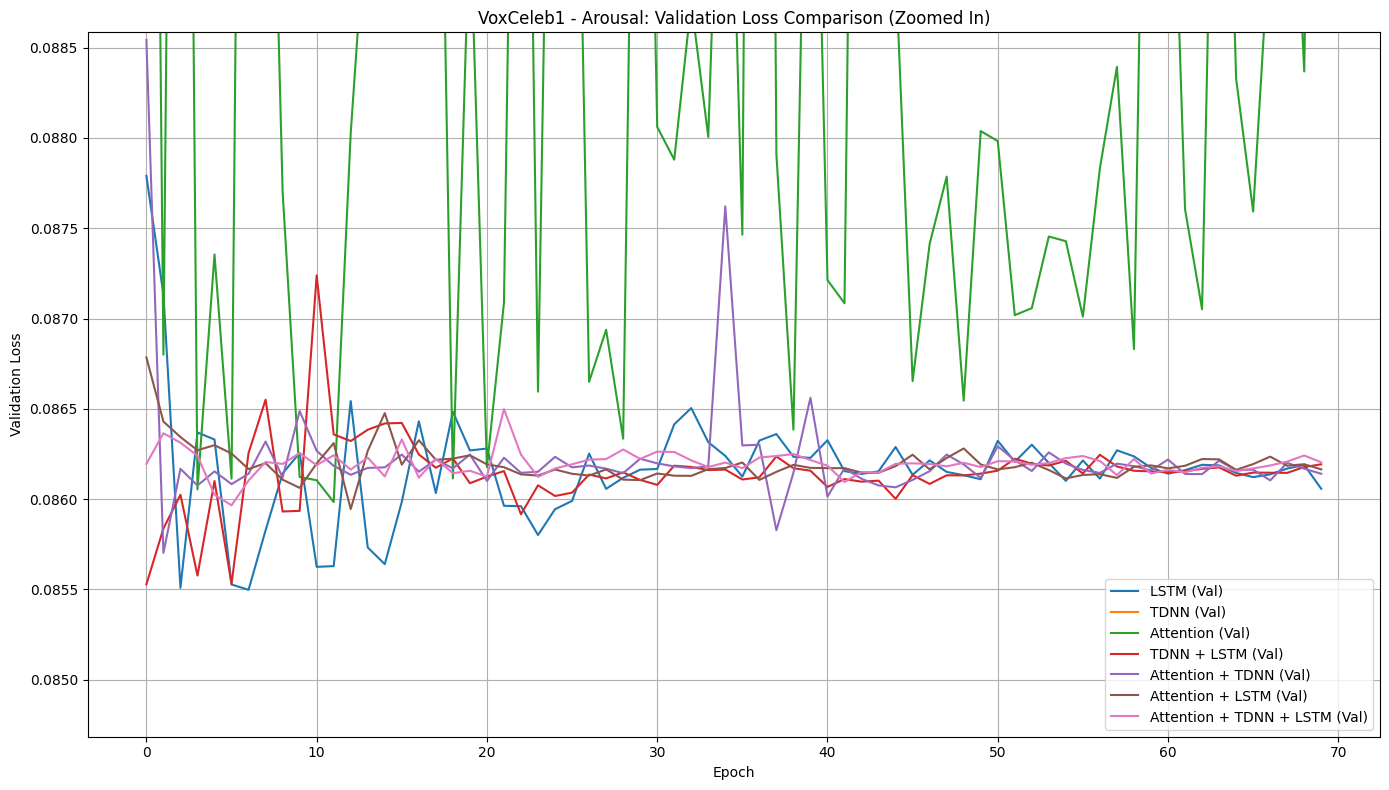

In [45]:
all_val_losses = [v.history['val_loss'] for v in histories_vox_arousal.values()]
flat_losses = np.concatenate(all_val_losses)

q1, q3 = np.percentile(flat_losses, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.figure(figsize=(14, 8))
for name, hist in histories_vox_arousal.items():
    plt.plot(hist.history['val_loss'], label=f'{name} (Val)')

plt.title('VoxCeleb1 - Arousal: Validation Loss Comparison (Zoomed In)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim(lower_bound, upper_bound)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

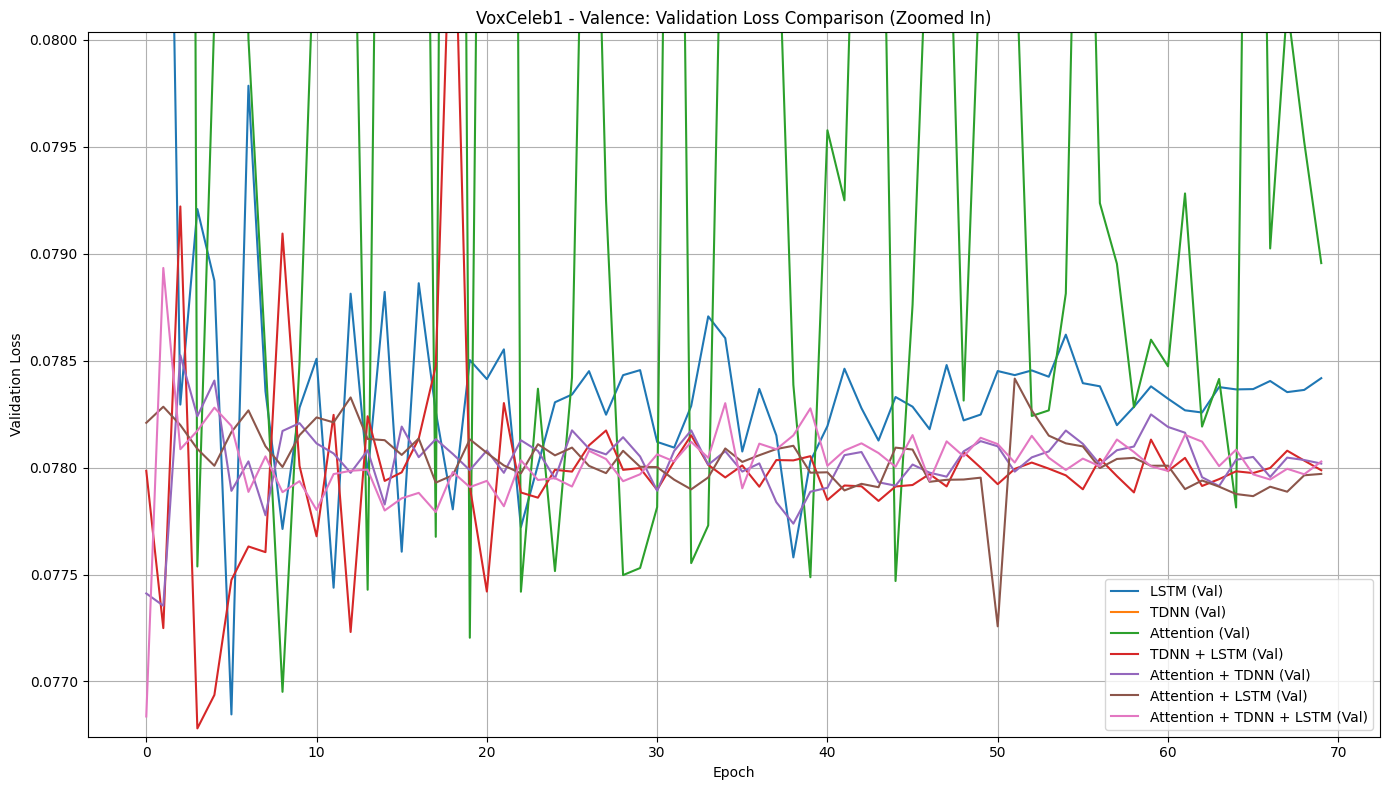

In [46]:
all_val_losses_valence = [v.history['val_loss'] for v in histories_vox_valence.values()]
flat_losses_val = np.concatenate(all_val_losses_valence)

q1_val, q3_val = np.percentile(flat_losses_val, [25, 75])
iqr_val = q3_val - q1_val
lower_bound_val = q1_val - 1.5 * iqr_val
upper_bound_val = q3_val + 1.5 * iqr_val

plt.figure(figsize=(14, 8))
for name, hist in histories_vox_valence.items():
    plt.plot(hist.history['val_loss'], label=f'{name} (Val)')

plt.title('VoxCeleb1 - Valence: Validation Loss Comparison (Zoomed In)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.ylim(lower_bound_val, upper_bound_val)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

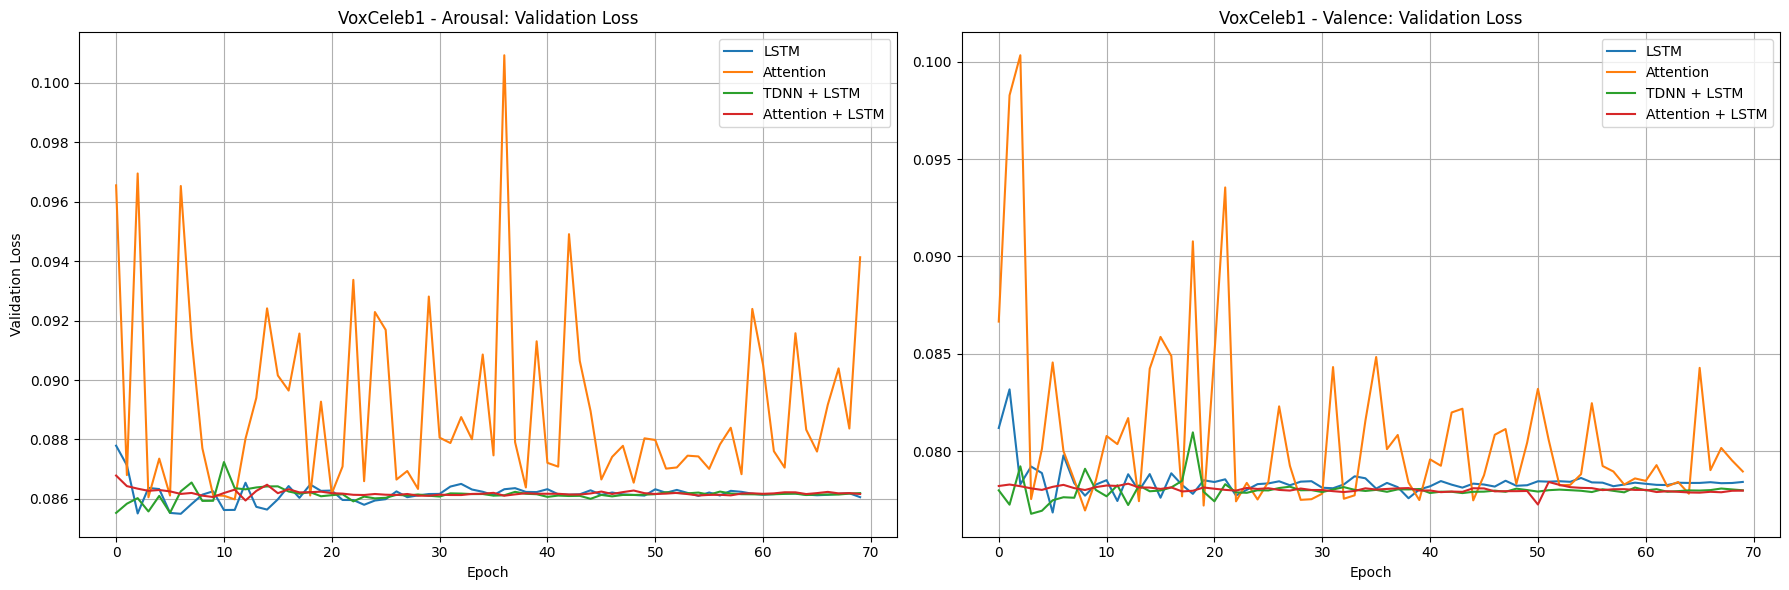

In [47]:
import matplotlib.pyplot as plt

# Filter out TDNN-only models (but keep TDNN+LSTM)
histories_vox_arousal_clipped = {
    k: v for k, v in histories_vox_arousal.items()
    if 'TDNN' not in k or k == 'TDNN + LSTM'
}

histories_vox_valence_clipped = {
    k: v for k, v in histories_vox_valence.items()
    if 'TDNN' not in k or k == 'TDNN + LSTM'
}

# Create subplot layout
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# --- Arousal subplot ---
for name, hist in histories_vox_arousal_clipped.items():
    axs[0].plot(hist.history['val_loss'], label=f'{name}')
axs[0].set_title('VoxCeleb1 - Arousal: Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Validation Loss')
axs[0].legend()
axs[0].grid(True)

# --- Valence subplot ---
for name, hist in histories_vox_valence_clipped.items():
    axs[1].plot(hist.history['val_loss'], label=f'{name}')
axs[1].set_title('VoxCeleb1 - Valence: Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()